In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 23)
pd.set_option('display.max_rows', 300)
songs = pd.read_csv('spotify_songs.csv')
all_songs = pd.read_csv('spotify_songs.csv')

In [ ]:
# '''Eliminating duplicates'''
# top_songs = pd.DataFrame(songs.groupby('track_name')['track_artist'].value_counts())
# top_songs.sort_values(by = ['count'], ascending = False, inplace = True)
# filter = top_songs['count'] >= 0
# top_tunes = pd.DataFrame(top_songs[filter])
# full_data = songs.set_index(['track_name', 'track_artist'], drop = False)
# full = full_data.loc[top_tunes.index]
# full.sort_values(by = 'track_popularity', ascending = False, inplace = True)
# full.drop_duplicates(inplace = True, subset = ['track_name', 'track_artist'])
# full.drop(axis = 1, columns = ['track_id', 'playlist_id', 'playlist_id', 'track_id', 'track_album_id', 'mode', 'duration_ms', 'key', 'instrumentalness', 'loudness', 'track_album_name', 'track_album_release_date', 'playlist_name'], inplace = True)
# full.index = [x for x in range(0, len(full.index))]
# full['corr_score'] = [0.0 for x in range(0, len(full.index))]

In [2]:
'''Eliminating duplicates explained'''
top_songs = pd.DataFrame(songs.groupby('track_name')['track_artist'].value_counts())
# This groups all duplicate songs (same artist and song name, and finds their value_count)
top_songs.sort_values(by = ['count'], ascending = False, inplace = True)
filter = top_songs['count'] >= 0
top_tunes = pd.DataFrame(top_songs[filter])
# the filtering aims to find the most common songs
full_data = songs.set_index(['track_name', 'track_artist'], drop = False)
# An index matching filtering is to happen with the 'track_name' and 'track_artist', which is also the index of our `top_tunes`
full = full_data.loc[top_tunes.index]
# This gets every song in top_tunes with their full data (they only had value counts before
full.sort_values(by = 'track_popularity', ascending = False, inplace = True)
full.drop_duplicates(inplace = True, subset = ['track_name', 'track_artist'])
full.drop(axis = 1, columns = ['track_id', 'playlist_id', 'playlist_id', 'track_id', 'track_album_id', 'mode', 'duration_ms', 'key', 'instrumentalness', 'loudness', 'track_album_name', 'track_album_release_date', 'playlist_name'], inplace = True)
# The df is sorted by highest popularity, and other duplicates are dropped. Columns not needed are dropped too.
full.index = [x for x in range(0, len(full.index))]
full['corr_score'] = [0 for x in range(0, len(full.index))]
# The index is updated. And a new column is added

In [52]:
full.head(20)

,track_name,track_artist,track_popularity,corr_score,playlist_genre,playlist_subgenre,danceability,energy,speechiness,acousticness,liveness,valence,tempo
0,Dance Monkey,Tones and I,100,18.30,pop,post-teen pop,0.824,0.588,0.0924,0.69200,0.1490,0.5130,98.027
1,ROXANNE,Arizona Zervas,99,7.75,r&b,hip pop,0.621,0.601,0.1480,0.05220,0.4600,0.4570,116.735
2,Blinding Lights,The Weeknd,98,7.45,pop,post-teen pop,0.513,0.796,0.0629,0.00147,0.0938,0.3450,171.017
3,Circles,Post Malone,98,15.00,pop,post-teen pop,0.695,0.762,0.0395,0.19200,0.0863,0.5530,120.042
4,The Box,Roddy Ricch,98,9.70,rap,trap,0.896,0.586,0.0559,0.10400,0.7900,0.6420,116.971
5,Tusa,KAROL G,98,17.00,edm,pop edm,0.803,0.715,0.2980,0.29500,0.0574,0.5740,101.085
6,Memories,Maroon 5,98,25.70,edm,pop edm,0.764,0.320,0.0546,0.83700,0.0822,0.5750,91.019
7,Falling,Trevor Daniel,97,14.20,edm,pop edm,0.784,0.430,0.0364,0.12300,0.0887,0.2360,127.087
8,everything i wanted,Billie Eilish,97,12.70,latin,latin hip hop,0.704,0.225,0.0994,0.90200,0.1060,0.2430,120.006
9,Don't Start Now,Dua Lipa,97,10.75,latin,latin hip hop,0.794,0.793,0.0842,0.01250,0.0952,0.6770,123.941


In [55]:
'''finding songs similar to my most played songs : The values will be correlated to all other values of other songs, the song that has the 
highest sum will be the most similar to the song'''
filtt = full['track_artist'] == 'Ed Sheeran'
full[filtt].head(29)

# I'm just checking for the song to pick here

,track_name,track_artist,track_popularity,corr_score,playlist_genre,playlist_subgenre,danceability,energy,speechiness,acousticness,liveness,valence,tempo
29,South of the Border (feat. Camila Cabello & Ca...,Ed Sheeran,91,15.75,edm,pop edm,0.857,0.621,0.0824,0.14800,0.0865,0.668,97.986
47,I Don't Care (with Justin Bieber),Ed Sheeran,90,13.85,edm,pop edm,0.798,0.675,0.0442,0.09120,0.0894,0.842,101.956
62,Beautiful People (feat. Khalid),Ed Sheeran,89,17.00,latin,latin pop,0.640,0.648,0.1870,0.12400,0.0802,0.548,92.977
124,Perfect,Ed Sheeran,86,19.20,latin,latin hip hop,0.599,0.448,0.0232,0.16300,0.1060,0.168,95.050
132,Shape of You,Ed Sheeran,86,15.70,pop,electropop,0.825,0.652,0.0802,0.58100,0.0931,0.931,95.977
180,Photograph,Ed Sheeran,84,14.70,latin,latin pop,0.614,0.379,0.0476,0.60700,0.0986,0.201,107.989
263,Thinking out Loud,Ed Sheeran,83,19.85,latin,latin pop,0.781,0.445,0.0295,0.47400,0.1840,0.591,78.998
478,Galway Girl,Ed Sheeran,80,10.75,pop,electropop,0.624,0.876,0.1000,0.07350,0.3270,0.781,99.943
855,Perfect Duet (Ed Sheeran & Beyoncé),Ed Sheeran,77,22.55,r&b,hip pop,0.587,0.299,0.0263,0.77900,0.1230,0.356,94.992
1475,Best Part of Me (feat. YEBBA),Ed Sheeran,74,11.40,r&b,urban contemporary,0.565,0.242,0.0318,0.76200,0.2850,0.237,81.657


In [56]:
my_song = (full['track_name'] == 'Photograph') & (full['track_artist'] == 'Ed Sheeran')
full[my_song]

,track_name,track_artist,track_popularity,corr_score,playlist_genre,playlist_subgenre,danceability,energy,speechiness,acousticness,liveness,valence,tempo
180,Photograph,Ed Sheeran,84,14.7,latin,latin pop,0.614,0.379,0.0476,0.607,0.0986,0.201,107.989


In [6]:
#order - [tempo, energy, danceability, valence, liveness, speechiness, acousticness]
#points - 7, 6, 5, 4, 3, 2, 2 
# Above are the characterisitics to be correlated, and the corresponding max points that can be achieved.
# These are the characteristics I have judged to be the most important in songs being similar.

'''song_ind = song index, this is the index of the song to be compared with other songs. ind, which changes with the for loop will correspond to 
the index of every other song that will be correlated with the our chosen song (song_ind). So `a` gets the tempo of our song, it compares it with
the tempo of another song `b`. `c`, the absolute value of the difference is subjected to a series of conditionals which determine the points it gets. 
The value is returned whenever the fucntion is called. The same basically applies for the rest of the characteristics to be compared.'''

# Tempo
def temp_corr(song_ind, ind):
    a = full.loc[song_ind, 'tempo']
    b = full.loc[ind, 'tempo']
    c = abs(a-b)
    if c <= 4:
        c = 7
    elif c <= 9:
        c = 5
    elif c <= 14:
        c = 3
    elif c <= 20:
        c = 1
    else:
        c = 0
    return c

In [7]:
# Energy
def energy_corr(song_ind, ind):
    a = full.loc[song_ind, 'energy']
    b = full.loc[ind, 'energy']
    c = abs(a-b)
    if c <= 0.07:
        c = 6    
    elif c <= 0.15:
        c = 4
    elif c <= 0.25:
        c = 2
    elif c <= 0.3:
        c = 2
    else:
        c = 0
    return c
    

In [8]:
# danceability
def dance_corr(song_ind, ind):
    a = full.loc[song_ind, 'danceability']
    b = full.loc[ind, 'danceability']
    c = abs(a-b)
    if c <= 0.09:
        c = 5    
    elif c <= 0.19:
        c = 3
    elif c <= 0.29:
        c = 1
    elif c <= 0.35:
        c = 0.5
    else:
        c = 0
    return c

In [9]:
# valence
def val_corr(song_ind, ind):
    a = full.loc[song_ind, 'valence']
    b = full.loc[ind, 'valence']
    c = abs(a-b)
    if c <= 0.09:
        c = 4    
    elif c <= 0.24:
        c = 2.75
    elif c <= 0.31:
        c = 1.85
    elif c <= 0.4:
        c = 0.7
    else:
        c = 0
    return c

In [10]:
# liveness
def liv_corr(song_ind, ind):
    a = full.loc[song_ind, 'liveness']
    b = full.loc[ind, 'liveness']
    c = abs(a-b)
    if c <= 0.04:
        c = 3   
    elif c <= 0.1:
        c = 2.3
    elif c <= 0.19:
        c = 1.85
    elif c <= 0.22:
        c = 0.7
    else:
        c = 0
    return c

In [11]:
# speechiness
def speech_corr(song_ind, ind):
    a = full.loc[song_ind, 'speechiness']
    b = full.loc[ind, 'speechiness']
    c = abs(a-b)
    if c <= 0.004:
        c = 2   
    elif c <= 0.01:
        c = 1.5
    elif c <= 0.019:
        c = 1.
    elif c <= 0.035:
        c = 0.7
    else:
        c = 0
    return c

In [12]:
# acousticness
def acoust_corr(song_ind, ind):
    a = full.loc[song_ind, 'acousticness']
    b = full.loc[ind, 'acousticness']
    c = abs(a-b)
    if c <= 0.004:
        c = 2   
    elif c <= 0.01:
        c = 1.5
    elif c <= 0.019:
        c = 1.
    elif c <= 0.035:
        c = 0.7
    else:
        c = 0
    return c


In [15]:

# '''This helps to assign a correlation score to each song based on the characteristics above. The functions above are used'''
# for ind in range(0, len(full.index)):
#     score_list = []
#     song_ind = 129	
#     score_list.append(temp_corr(song_ind, ind))
#     score_list.append(energy_corr(song_ind, ind))
#     score_list.append(dance_corr(song_ind, ind))
#     score_list.append(val_corr(song_ind, ind))
#     score_list.append(liv_corr(song_ind, ind))
#     score_list.append(speech_corr(song_ind, ind))
#     score_list.append(acoust_corr(song_ind, ind))
#     total = sum(score_list)
#     full.loc[ind, 'corr_score'] = total

In [57]:
'''Assigning a correlation score to each song based on the similarities in the characteristics above. I reference the above
functions'''

for ind in range(0, len(full.index)):
# The 'ind' correlates to the index
    score_list = []
    song_ind = 180
# This is the song to be compared
    score_list.append(temp_corr(song_ind, ind))
    score_list.append(energy_corr(song_ind, ind))
    score_list.append(dance_corr(song_ind, ind))
    score_list.append(val_corr(song_ind, ind))
    score_list.append(liv_corr(song_ind, ind))
    score_list.append(speech_corr(song_ind, ind))
    score_list.append(acoust_corr(song_ind, ind))
# The `c` from each of the functions is returned, and it is appended into a list
    total = sum(score_list)
    full.loc[ind, 'corr_score'] = total
# The sum of the list is gotten and its is appended, at a corresponding index in `corr_score` column.

In [58]:
full.insert(3, 'corr_score', full.pop('corr_score'))
full.sort_values(by = 'corr_score', ascending = False).head(50)

,track_name,track_artist,track_popularity,corr_score,playlist_genre,playlist_subgenre,danceability,energy,speechiness,acousticness,liveness,valence,tempo
180,Photograph,Ed Sheeran,84,29.00,latin,latin pop,0.614,0.379,0.0476,0.607000,0.0986,0.2010,107.989
13460,Praying To A God - Melio Remix,Mr. Probz,43,27.00,latin,tropical,0.660,0.419,0.0457,0.197000,0.1170,0.2080,110.021
2762,Electric (feat. Khalid),Alina Baraz,69,26.50,r&b,urban contemporary,0.599,0.396,0.0392,0.738000,0.1020,0.1340,111.072
8164,What Are You Doing New Year's Eve?,Ledisi,55,26.00,r&b,neo soul,0.530,0.326,0.0327,0.818000,0.0919,0.2290,111.831
21556,All You Need Is Love,Frank Mccomb,14,26.00,r&b,neo soul,0.634,0.328,0.0597,0.882000,0.0903,0.2100,108.085
14222,Lie,Shallou,41,25.70,pop,dance pop,0.655,0.427,0.0799,0.295000,0.0788,0.2240,107.992
13827,Pixelated Memories,Pandrezz,42,25.70,rap,hip hop,0.670,0.312,0.0282,0.754000,0.1270,0.2400,108.062
25104,The Reason - Acoustic,Hoobastank,0,25.70,latin,latin pop,0.555,0.346,0.0266,0.219000,0.1030,0.1510,107.180
14810,Te Perdí,Lautaro Lopez,39,25.70,rap,trap,0.631,0.405,0.0761,0.690000,0.0860,0.1650,109.986
7539,Into The Black,Chromatics,56,25.70,pop,indie poptimism,0.614,0.383,0.0268,0.961000,0.0790,0.1330,109.008


<Axes: xlabel='track_name'>

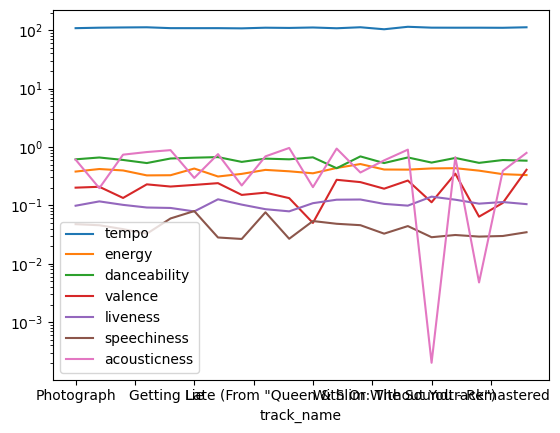

In [59]:
'''Checking the visual correlation of the top 20 songs'''
full.sort_values(by = 'corr_score', ascending = False).head(20).plot(x = 'track_name', y = ['tempo', 'energy', 'danceability', 'valence', 'liveness', 'speechiness', 'acousticness'], logy = True)

In [60]:
'''Checking how similar the song is to an artist's song'''
filt = full['track_artist'].str.contains('Taylor Swift')
full[filt]

,track_name,track_artist,track_popularity,corr_score,playlist_genre,playlist_subgenre,danceability,energy,speechiness,acousticness,liveness,valence,tempo
121,You Need To Calm Down,Taylor Swift,86,9.50,pop,post-teen pop,0.771,0.671,0.0553,0.00929,0.0637,0.7140,85.026
151,Lover (Remix) [feat. Shawn Mendes],Taylor Swift,85,11.75,pop,dance pop,0.448,0.603,0.0640,0.43300,0.0862,0.4220,205.272
564,I Forgot That You Existed,Taylor Swift,79,15.70,r&b,hip pop,0.664,0.316,0.5190,0.29800,0.0812,0.5410,92.875
725,Blank Space,Taylor Swift,78,11.20,edm,pop edm,0.760,0.703,0.0540,0.10300,0.0913,0.5700,95.997
1110,I Knew You Were Trouble.,Taylor Swift,76,12.30,pop,post-teen pop,0.622,0.469,0.0363,0.00454,0.0335,0.6790,77.019
1330,Look What You Made Me Do,Taylor Swift,74,7.85,pop,post-teen pop,0.766,0.709,0.1230,0.20400,0.1260,0.5060,128.070
1381,We Are Never Ever Getting Back Together,Taylor Swift,74,10.00,pop,post-teen pop,0.628,0.676,0.0916,0.00957,0.1210,0.7500,85.984
2171,Delicate,Taylor Swift,71,18.45,edm,pop edm,0.750,0.404,0.0682,0.21600,0.0911,0.0499,95.045
2865,22,Taylor Swift,68,13.30,pop,post-teen pop,0.661,0.729,0.0376,0.00215,0.0477,0.6680,103.987
2921,End Game,Taylor Swift,68,15.50,r&b,hip pop,0.649,0.589,0.0558,0.00845,0.1080,0.1510,159.073


<Axes: title={'center': "('r&b', 'neo soul')"}, xlabel='track_name'>

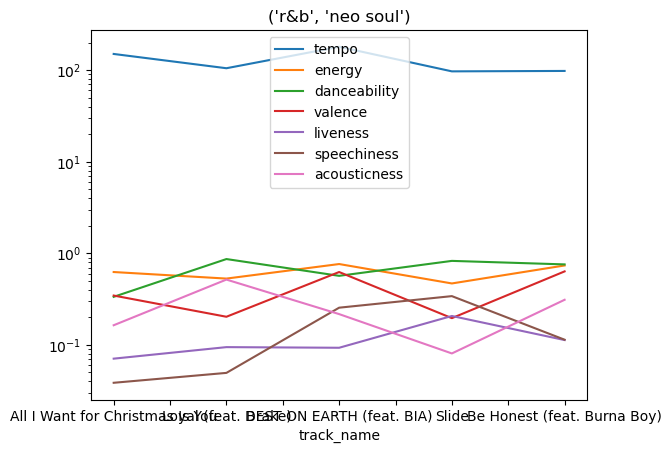

In [34]:
# Examining how these characteristics vary for various genres
full_grp = full.set_index(['playlist_genre', 'playlist_subgenre'])
multi_genres = full_grp.index.value_counts().index
full_g = full_grp.groupby(full_grp.index)
genre = full_g.get_group(multi_genres[1])
genre.index = [x for x in range(0, len(genre.index))]
genre_count = genre.head()
genre_count.plot(x = 'track_name', y = ['tempo', 'energy', 'danceability', 'valence', 'liveness', 'speechiness', 'acousticness'], logy = True,
                  title = f'{multi_genres[1]}')#logx = True)
#multi_genres
